/home/ray/anaconda3/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


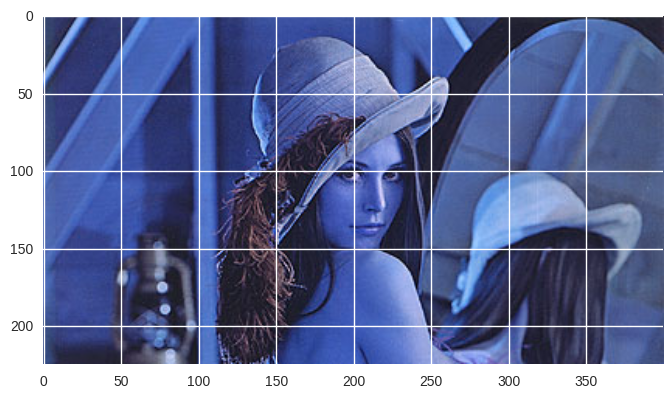

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import dct,idct
import seaborn as sea
import copy as cp
import random
img = cv2.imread('lena.jpg')
plt.imshow(img)
plt.show()

## Implemented DCT & IDCT for 2D using python functions

In [2]:
from scipy.fftpack import dct
def DCT_2d(M):
    return dct(dct(M.T, norm='ortho').T,norm='ortho')

In [3]:
from scipy.fftpack import idct
def IDCT_2d(M):
    return idct(idct(M, norm='ortho').T, norm='ortho').T

## Proving the correctness

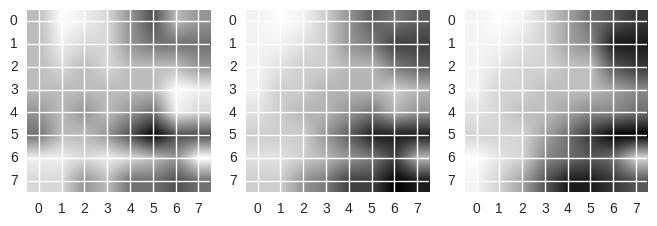

In [4]:
# Just to compare
part_of_the_img_0 = img[50:58, 50:58, 0] #using R
part_of_the_img_1 = img[50:58, 50:58, 1] #using G
part_of_the_img_2 = img[50:58, 50:58, 2] #using B
# Visualizing
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(part_of_the_img_0)
ax1 = fig.add_subplot(132)
ax1.imshow(part_of_the_img_1)
ax2 = fig.add_subplot(133)
ax2.imshow(part_of_the_img_2)

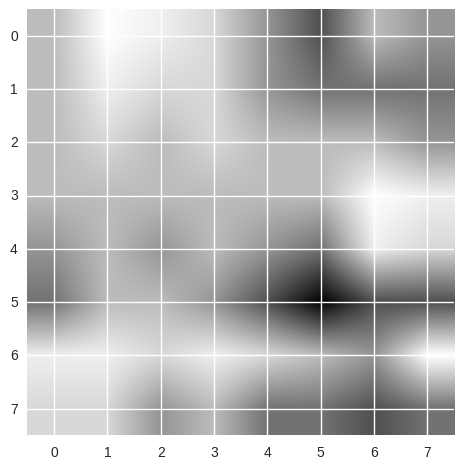

In [5]:
plt.imshow(part_of_the_img_0)
M = DCT_2d(part_of_the_img_0)

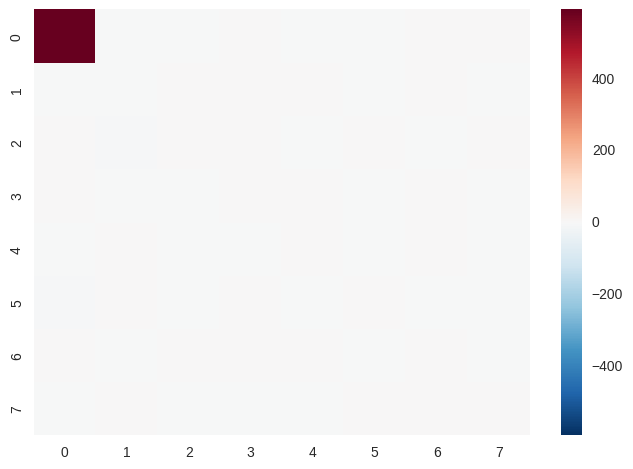

In [6]:
sea.heatmap(M)

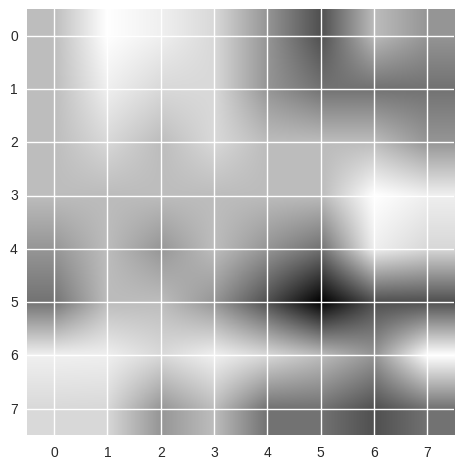

In [7]:
M1 = IDCT_2d(M)
plt.imshow(M1)

## Check the similarity of the initial matrix and the one we finally became

In [8]:
M1

array([[ 74.,  71.,  72.,  73.,  75.,  77.,  74.,  75.],
       [ 74.,  72.,  73.,  73.,  75.,  76.,  76.,  76.],
       [ 74.,  73.,  74.,  73.,  74.,  74.,  74.,  75.],
       [ 74.,  74.,  74.,  74.,  74.,  74.,  71.,  72.],
       [ 75.,  74.,  75.,  74.,  75.,  76.,  72.,  73.],
       [ 76.,  74.,  74.,  75.,  77.,  79.,  77.,  77.],
       [ 72.,  72.,  73.,  72.,  73.,  74.,  75.,  71.],
       [ 73.,  73.,  75.,  74.,  76.,  76.,  77.,  76.]])

In [9]:
part_of_the_img_0

array([[74, 71, 72, 73, 75, 77, 74, 75],
       [74, 72, 73, 73, 75, 76, 76, 76],
       [74, 73, 74, 73, 74, 74, 74, 75],
       [74, 74, 74, 74, 74, 74, 71, 72],
       [75, 74, 75, 74, 75, 76, 72, 73],
       [76, 74, 74, 75, 77, 79, 77, 77],
       [72, 72, 73, 72, 73, 74, 75, 71],
       [73, 73, 75, 74, 76, 76, 77, 76]], dtype=uint8)

In [10]:
M1 == part_of_the_img_0

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [11]:
print M1[1][6]
print part_of_the_img_0[1][6]

76.0
76


Notice that the matrixes are similar, they differ only by type, so the functions work!

## Let me introduce our basic functions :)

In [12]:
TM = np.matrix('1 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0')

[[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]]


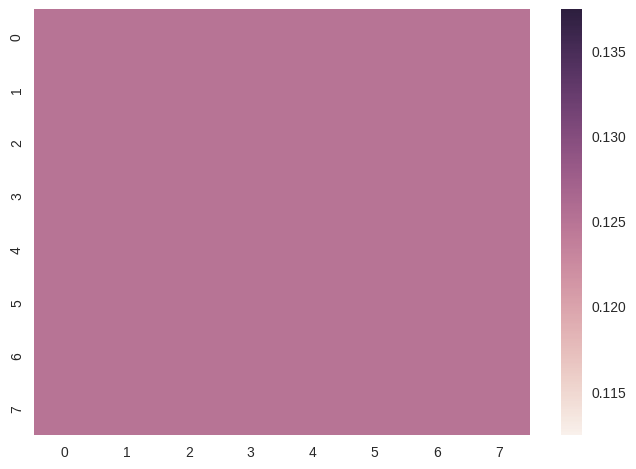

In [13]:
M1 = IDCT_2d(TM) #inverse DCT
sea.heatmap(M1) #as expected the function is constant
print M1

In [14]:
TM1 = np.matrix('0 1 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

[[ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]]


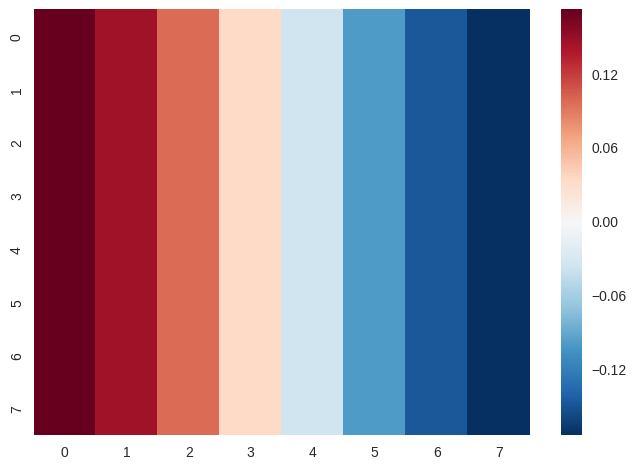

In [15]:
M2 = IDCT_2d(TM1)
sea.heatmap(M2) #the function is cos(...) 
print M2

In [16]:
TM1[0,1]

1

And so on we can become the bases functions

## Let's try to affect the [0,1] elem of DCT 2d

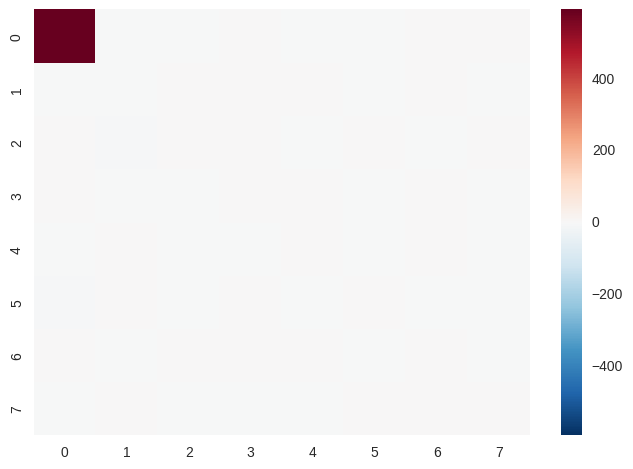

In [17]:
#plt.imshow(part_of_the_img_0)
T = DCT_2d(part_of_the_img_0)
sea.heatmap(T)

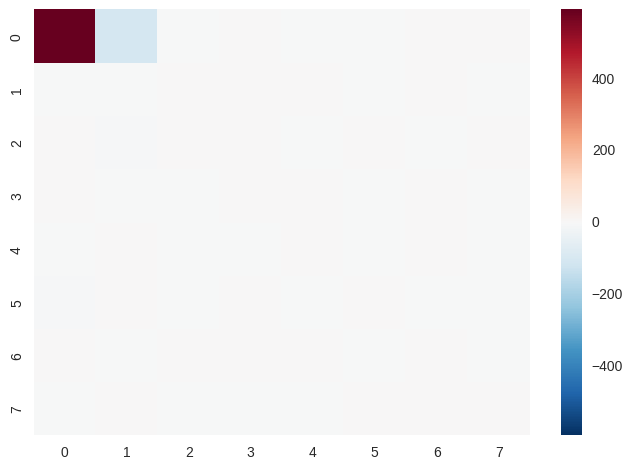

In [18]:
T = DCT_2d(part_of_the_img_0-100*M2) #M2 - THE BASIC FUNCTION OF [0,1]
sea.heatmap(T)

### Hurrray we changed the [0,1] coeff of DCT !!!

## Now have a look at initial and changed pictures 

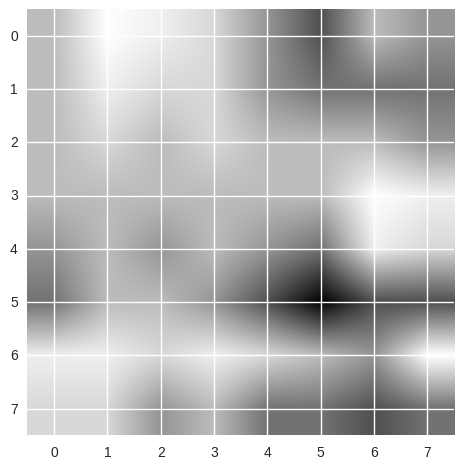

In [19]:
plt.imshow(part_of_the_img_0) # original

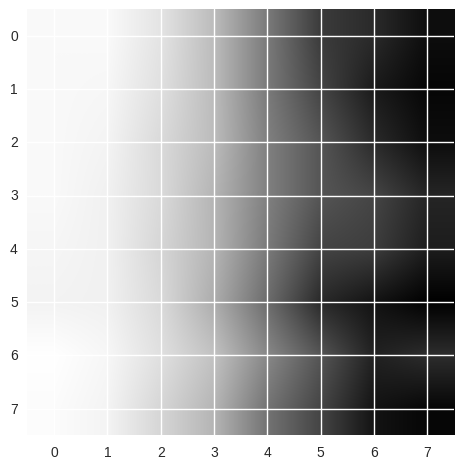

In [20]:
plt.imshow(part_of_the_img_0-100*M2) #transformed

The numbers in pixels change smoothly, this gives a hope that our changes will not be noticed by histograms!

## Experimentation with matrix modifiers

In [21]:
testblock = img[250:258, 150:158, 0]
print img.shape



def testmodifier(modifier, rstart, cstart, blockNum):
    img_toplay = cp.copy(img)
    
    for i in range(0,blockNum):
        for j in range(0,blockNum):
            img_block = cp.copy(img[rstart + i*8:rstart+8 + i*8, cstart + j*8:cstart+8 + j*8])
            scale = 1#7*16
            addend = IDCT_2d(scale * modifier)
            #img_block[:,:,0] = img_block[:,:,0] + addend
            #img_block[:,:,1] = img_block[:,:,1] + addend
            img_block[:,:,2] = img_block[:,:,2] + addend
    

            img_toplay[rstart+i*8:rstart+8+i*8, cstart+j*8:cstart+8+j*8] = img_block
            #diff = (-img + img_toplay)[250:258,150:158]
    
    plt.imshow(img)
    plt.show()
    
    plt.imshow(img_toplay)
    plt.show()
    
    cv2.imwrite('lena_modified.jpg', img_toplay)
    
    
    bins = [0]
    for n in range(0, 257):
        bins.append(n)

    width = 1
    leftborders = bins[:-1]


    # Red plane
    coverhistred = np.histogram(img[:,:,0], bins=bins)[0]
    plt.bar(leftborders, coverhistred, width=width, linewidth=0, color='r')
    plt.show()
    stegohistred = np.histogram(img_toplay[:,:,0], bins=bins)[0]
    plt.bar(leftborders, stegohistred, width=width, linewidth=0, color='r')
    plt.show()
   
    coverhistred = np.histogram(img[:,:,1], bins=bins)[0]
    plt.bar(leftborders, coverhistred, width=width, linewidth=0, color='g')
    plt.show()
    stegohistred = np.histogram(img_toplay[:,:,1], bins=bins)[0]
    plt.bar(leftborders, stegohistred, width=width, linewidth=0, color='g')
    plt.show()
    
    coverhistred = np.histogram(img[:,:,2], bins=bins)[0]
    plt.bar(leftborders, coverhistred, width=width, linewidth=0, color='b')
    plt.show()
    stegohistred = np.histogram(img_toplay[:,:,2], bins=bins)[0]
    plt.bar(leftborders, stegohistred, width=width, linewidth=0, color='b')
    plt.show()
    
    
tm0 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

one_bit_matrix = np.matrix('16 11 10 16 24 40 51 61\
                ; 12 12 14 19 26 58 60 55 \
                ; 14 13 16 24 40 57 69 56 \
                ; 14 17 22 29 51 87 80 62 \
                ; 18 22 37 56 68 109 103 77 \
                ; 24 35 55 64 81 104 113 92 \
                ; 49 64 78 87 103 121 120 101 \
                ; 72 92 95 98 112 100 103 99')


tm9 = np.matrix('112 0 0 0 0 0 0 0\
               ; 0 84 0 0 0 0 0 0\
               ; 0 0 112 0 0 0 0 0\
               ; 0 0 0 0 100 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 99')

tm1 = np.matrix('1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1\
               ; 1 1 1 1 1 1 1 1')

tm2 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 1')

tm3 = np.matrix('1 1 1 1 1 1 1 1\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

tm4 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 1 1 1 1 1 1 1 1')

tm5 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 1')

tm6 = np.matrix('1 0 0 0 0 0 0 0\
               ; 0 1 0 0 0 0 0 0\
               ; 0 0 1 0 0 0 0 0\
               ; 0 0 0 1 0 0 0 0\
               ; 0 0 0 0 1 0 0 0\
               ; 0 0 0 0 0 1 0 0\
               ; 0 0 0 0 0 0 1 0\
               ; 0 0 0 0 0 0 0 1')

tm7 = np.matrix('0 1 1 1 1 1 1 1\
               ; 1 0 1 1 1 1 1 1\
               ; 1 1 0 1 1 1 1 1\
               ; 1 1 1 0 1 1 1 1\
               ; 1 1 1 1 0 1 1 1\
               ; 1 1 1 1 1 0 1 1\
               ; 1 1 1 1 1 1 0 1\
               ; 1 1 1 1 1 1 1 0')

tm8 = np.matrix('0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 1 0 0 0 0\
               ; 0 0 0 0 1 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')



#print 'TM0:'
#testmodifier(tm0)
#print 'TM1:'
#testmodifier(tm1)
#print 'TM2:'
#testmodifier(tm2)
# print 'TM3:'
# testmodifier(tm3)
#print 'TM4:'
#testmodifier(tm4)
# print 'TM5:'
# testmodifier(tm5)
# print 'TM6:'
# testmodifier(tm6)
# print 'TM7:'
# testmodifier(tm7)

print 'TM0:'
testmodifier(one_bit_matrix,0,0,100)

(225, 400, 3)
TM0:


ValueError: operands could not be broadcast together with shapes (8,0) (8,8) 

## LSB in DCT

In [22]:
# Set the i-th bit of byte to value
def setbit(byte, i, value):
    # remove the original i-th bit of byte
    mask = ~ (1 << i)
    newbyte = byte & mask
    # set value
    if value:
        newbyte |= ~mask
    return newbyte

# Set the LSB
def setlsb(byte, value):
    return setbit(byte, 0, value)

# Embeds message bits into a 2D cover array
def embed2D(coverarray, msgbits):
    stegoarray = np.copy(coverarray)
    for rowindex in range(0, len(coverarray)):
        for columnindex in range(0, len(coverarray[rowindex])):
            # Return if there are no more bits left to embed
            if len(msgbits) == 0:
                return stegoarray
            
            bit = msgbits.pop(0)
            value = coverarray[rowindex, columnindex]
            stegovalue = setlsb(value, bit)
            stegoarray[rowindex, columnindex] = stegovalue
    return stegoarray

# Example of embed2D altering an array
msgbits = [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
msglength = len(msgbits)
redplane = img[:, :, 0]
# Only displaying the first entries to shorten output
print(redplane[0,:20])
stegoarray2D = embed2D(redplane, msgbits)
print(stegoarray2D[0,:20])
print((redplane == stegoarray2D)[0,:20])

[53 53 52 52 54 58 55 49 50 53 55 51 51 53 54 51 49 52 36 64]
[53 52 52 53 55 59 54 48 50 53 55 50 51 53 54 51 49 53 36 65]
[ True False  True False False False False False  True  True  True False
  True  True  True  True  True False  True False]


Image after DCT quantization


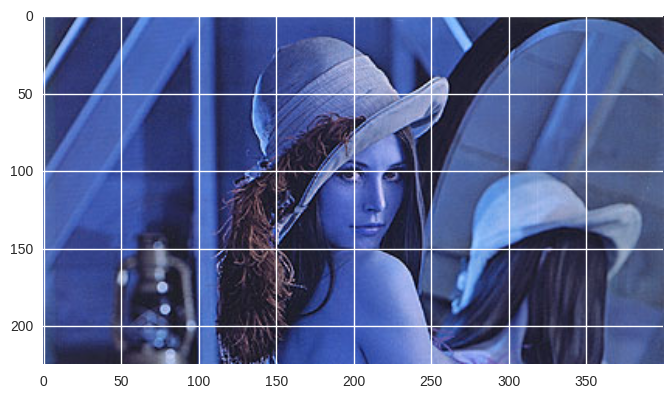

Image after embedding random message


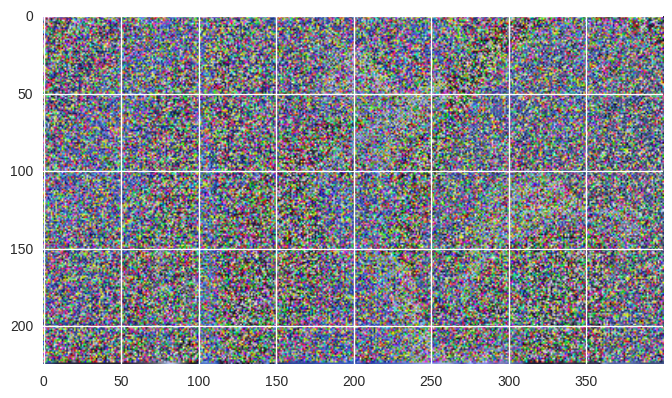

In [23]:
# source: http://impulseadventure.com/photo/jpeg-quantization.html
qmatrix = np.matrix('16 11 10 16 24 40 51 61\
                   ; 12 12 14 19 26 58 60 55\
                   ; 14 13 16 24 40 57 69 56\
                   ; 14 17 22 29 51 87 80 62\
                   ; 18 22 37 56 68 109 103 77\
                   ; 24 35 55 64 81 104 113 92\
                   ; 49 64 78 87 103 121 120 101\
                   ; 72 92 95 98 112 100 103 99')

def quantize(block):
    quantized = np.zeros(block.shape, dtype=int)
    for i in range(len(block)):
        for j in range(len(block[i])):
            quantized[i, j] = block[i, j] // qmatrix[i, j]
    return quantized

def dequantize(quantized):
    block = np.copy(quantized)
    for i in range(len(quantized)):
        for j in range(len(quantized[i])):
            block[i, j] = quantized[i, j] * qmatrix[i, j]
    return block

# print img[:8, :8, 0]
# quantized = quantize(img[:8, :8, 0])
# print quantized
# block = dequantize(quantized)
# print block

def process(block):
    DCT = DCT_2d(block)
    DCTq = quantize(DCT)
    newDCT = dequantize(DCTq)
    newblock = IDCT_2d(DCT)
    return newblock

# Quantizes DCT of an image
def processimg(img):
    processed = np.copy(img)
    for row in range(0, len(img)-7, 8):
        for column in range(0, len(img[row])-7, 8):
            for layer in range(0, len(img[row, column])):
                block = img[row:row+8, column:column+8, layer]
                processed[row:row+8, column:column+8, layer] = process(block)
    return processed

# Embeds in a 8x8 block by changing its quantized DCT
def embedDCT(coverblock, msgbits):
    coverDCT = DCT_2d(coverblock)
    coverDCTq = quantize(coverDCT)
    stegoDCTq = embed2D(coverDCTq, msgbits)
    stegoDCT = dequantize(stegoDCTq)
    stegoblock = IDCT_2d(stegoDCT)
    return stegoblock

# Embeds a message in an image
def embedimg(coverimg, msgbitsoriginal):
    msgbits = np.copy(msgbitsoriginal).tolist()
    stegoimg = np.copy(coverimg)
    for row in range(0, len(coverimg)-7, 8):
        for column in range(0, len(coverimg[row])-7, 8):
            for layer in range(0, len(coverimg[row, column])):
                coverblock = coverimg[row:row+8, column:column+8, layer]
                stegoimg[row:row+8, column:column+8, layer] = embedDCT(coverblock, msgbits)
    return stegoimg
    
print 'Image after DCT quantization'
processedimg = processimg(img)
plt.imshow(processedimg)
plt.show()

msgbits = []
space = (img.shape[0]//8 * 8) * (img.shape[1]//8 * 8) * img.shape[2]
for i in range(0, space + 1):
    value = random.choice([0, 1])
    msgbits.append(value)

print 'Image after embedding random message'
stegoimg = embedimg(img, msgbits)
plt.imshow(stegoimg)
plt.show()